# imports

In [ ]:
import os
path = os.getcwd()

if path[1:5] == 'Home':
    %run /Home/siv30/wad005/master/GRB/src/harvest_matlab_data.ipynb
    %run /Home/siv30/wad005/master/GRB/src/background_rates.ipynb
    %run /Home/siv30/wad005/master/GRB/src/dau_det_distribution.ipynb
    %run /Home/siv30/wad005/master/GRB/src/ASIMXspec.ipynb
    %run /Home/siv30/wad005/master/GRB/xspec/ASIM/ASIMFits/BAK/ASIMbak.ipynb
    %run /Home/siv30/wad005/master/GRB/xspec/ASIM/ASIMFits/PHA/ASIMpha.ipynb
    %run /Home/siv30/wad005/master/GRB/xspec/ASIM/ASIMFits/RSP/ASIMrsp.ipynb
    %run /Home/siv30/wad005/master/GRB/xspec/ASIM/ASIMFits/RSP/find_closest_DRM.ipynb
else:
    %run /Users/andreas/phys/master/GRB/src/harvest_matlab_data.ipynb
    %run /Users/andreas/phys/master/GRB/src/background_rates.ipynb
    %run /Users/andreas/phys/master/GRB/src/dau_det_distribution.ipynb
    %run /Users/andreas/phys/master/GRB/src/ASIMXspec.ipynb
    %run /Users/andreas/phys/master/GRB/xspec/ASIM/ASIMFits/BAK/ASIMbak.ipynb
    %run /Users/andreas/phys/master/GRB/xspec/ASIM/ASIMFits/PHA/ASIMpha.ipynb
    %run /Users/andreas/phys//master/GRB/xspec/ASIM/ASIMFits/RSP/ASIMrsp.ipynb
    %run /Users/andreas/phys//master/GRB/xspec/ASIM/ASIMFits/RSP/find_closest_DRM.ipynb

In [2]:
df_harvest = harvest_data(fn='2020_5_21_12_16_39',T0='2020-05-21T12:16:39.818')
T0=datetime.fromisoformat('2020-05-21T12:16:39.818')

dau/det starting from index 1
tus array given in seconds
safety time:  0.17 % removed
sorted by tus (s)


tus array OK ...


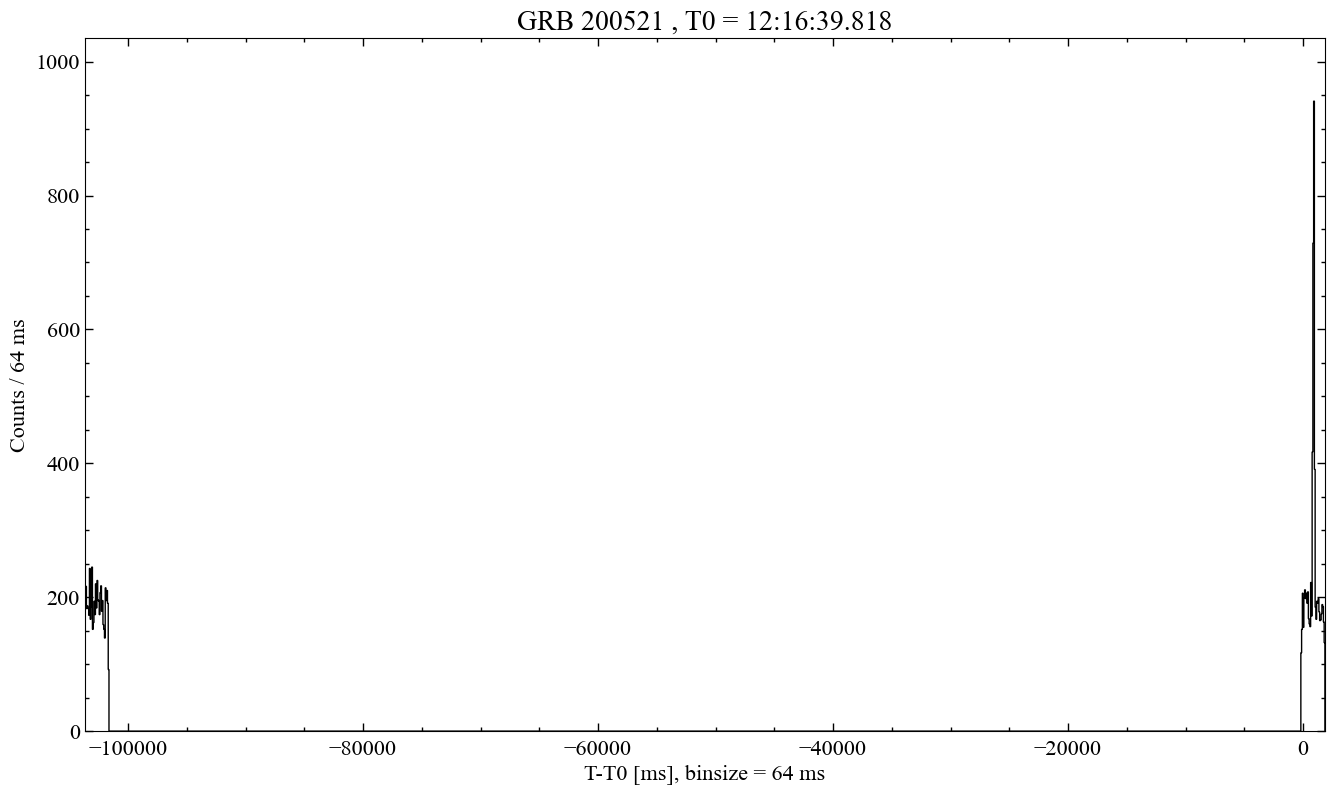

In [3]:
plot_HED(tus_arr=df_harvest['tus'].to_numpy()*1e6,binsize=64,T0=T0)

In [5]:
#plot_HED(tus_arr=df_bkg['tus'].to_numpy()*1e6,binsize=16,T0=T0)

In [6]:
#len(df_bkg['tus'].to_numpy())/(df_bkg['tus'].to_numpy()[-1]-df_bkg['tus'].to_numpy()[0])

In [28]:
cr, df_cr = get_count_rate(fn='2020_5_21_12_16_39',T0='2020-05-21T12:16:39.818',bkg_start='start',bkg_end=-100)

2020-05-21 12:16:39.818000
bkg starts and ends at:  start -100 s
dau/det starting from index 1
tus array given in seconds
safety time:  0.089 % removed
tus given in seconds
background count rate:  3005.172  counts/s
exposure:  2.008  s
returning count_rate and background df (sorted by tus (s) and st removed)


In [29]:
len(df_cr['tus'].to_numpy())/(df_cr['tus'].to_numpy()[-1]-df_cr['tus'].to_numpy()[0])

3005.172282934205

In [ ]:
plot_HED(tus_arr=df_cr['tus'].to_numpy()*1e6,binsize=16,T0=datetime.fromisoformat('2020-05-21T12:16:39.818')+timedelta(seconds=-103.675667))

# BURST

In [7]:
df_burst = df_harvest.truncate(before=6036)
df_burst

,year,month,day,hour,minute,second,erg,dau,det,datetime,tus,adr,keV,st,dt,flag
6036,2020,5,21,12,16,39.655234,81,1,3,2020-05-21 12:16:39.655234000,-0.162766,3,881.7344,4.053875,1.015071e+08,False
6037,2020,5,21,12,16,39.656063,41,1,3,2020-05-21 12:16:39.656062833,-0.161937,3,459.5845,0.595845,8.288330e+02,False
6038,2020,5,21,12,16,39.656369,470,2,2,2020-05-21 12:16:39.656368611,-0.161631,5,6586.1306,19.000000,4.883305e+03,False
6039,2020,5,21,12,16,39.656369,41,2,3,2020-05-21 12:16:39.656368639,-0.161631,6,450.7128,0.507128,3.279611e+03,False
6040,2020,5,21,12,16,39.657204,46,1,1,2020-05-21 12:16:39.657204111,-0.160796,1,428.3989,0.283989,2.517111e+03,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13508,2020,5,21,12,16,41.658874,81,2,3,2020-05-21 12:16:41.658874417,1.840874,6,870.0014,4.700014,7.687167e+03,False
13509,2020,5,21,12,16,41.658938,38,2,2,2020-05-21 12:16:41.658938444,1.840938,5,492.9123,0.929123,1.234339e+04,False
13510,2020,5,21,12,16,41.659131,1640,3,1,2020-05-21 12:16:41.659131306,1.841131,7,30655.2224,19.524178,5.136950e+02,False
13511,2020,5,21,12,16,41.659131,1731,4,3,2020-05-21 12:16:41.659131333,1.841131,12,29126.6179,24.301294,6.949166e+03,False


In [8]:
cr_burst,df_cr_burst = get_count_rate(fn='2020_5_21_12_16_39',T0='2020-05-21T12:16:39.818',bkg_start=-0.167481,bkg_end=1.841131)

2020-05-21 12:16:39.818000
bkg starts and ends at:  -0.167481 1.841131 s
dau/det starting from index 1
tus array given in seconds
safety time:  0.17 % removed
sorted by tus (s)
background count rate:  3726.951  counts/s
exposure:  2.009  s
returning count_rate and background df (sorted by tus (s) and st removed)


tus array OK ...


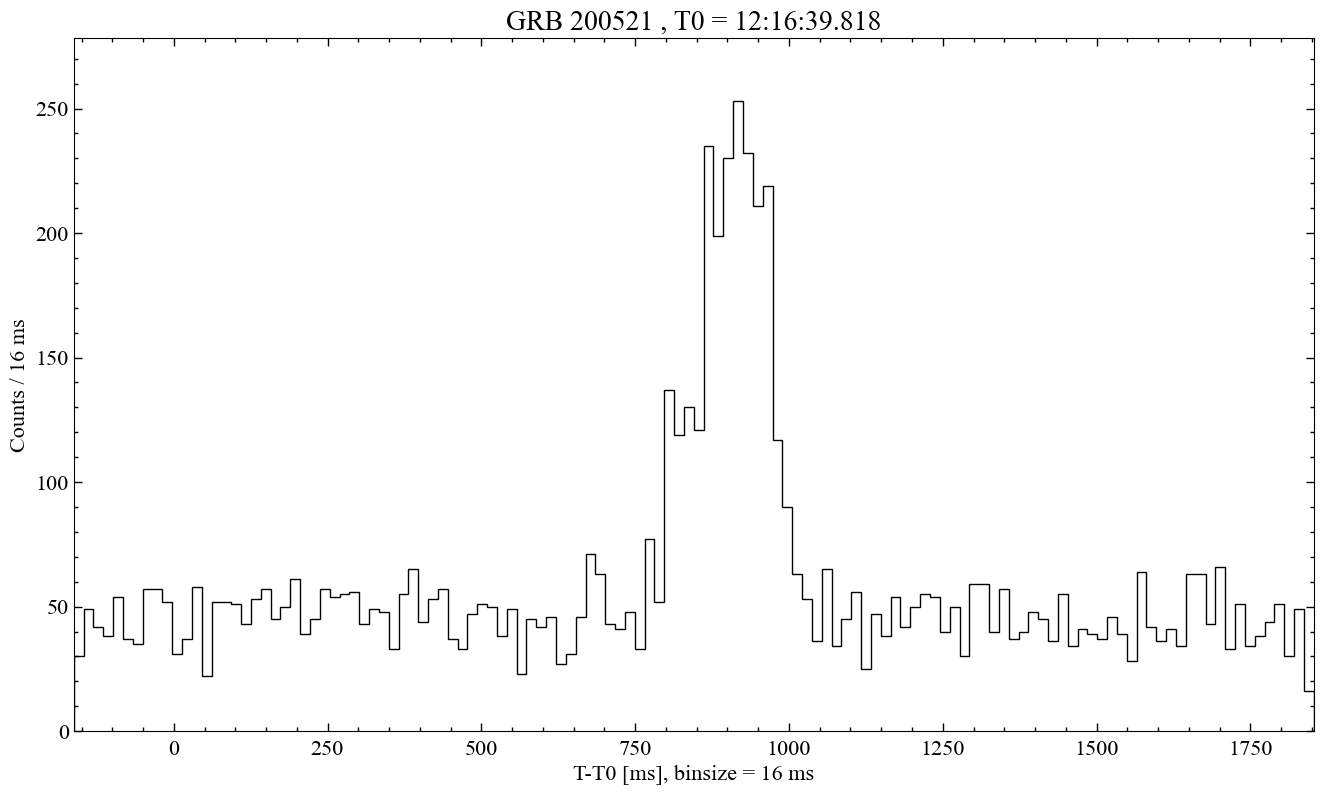

In [9]:
plot_HED(tus_arr=df_burst['tus'].to_numpy()*1e6,binsize=16,T0=datetime.fromisoformat('2020-05-21T12:16:39.818'))

In [10]:
tus_burst = df_burst['tus'].to_numpy()
print(type(tus_burst))
i,j = find_nearest(tus_burst,0.8),find_nearest(tus_burst,0.975)

print(len(tus_burst[i:j])/(tus_burst[i:j][-1]-tus_burst[i:j][0]))
print('exposure: ',tus_burst[i:j][-1]-tus_burst[i:j][0])

<class 'numpy.ndarray'>
11841.409669072194
exposure:  0.17497916700000016


tus array OK ...


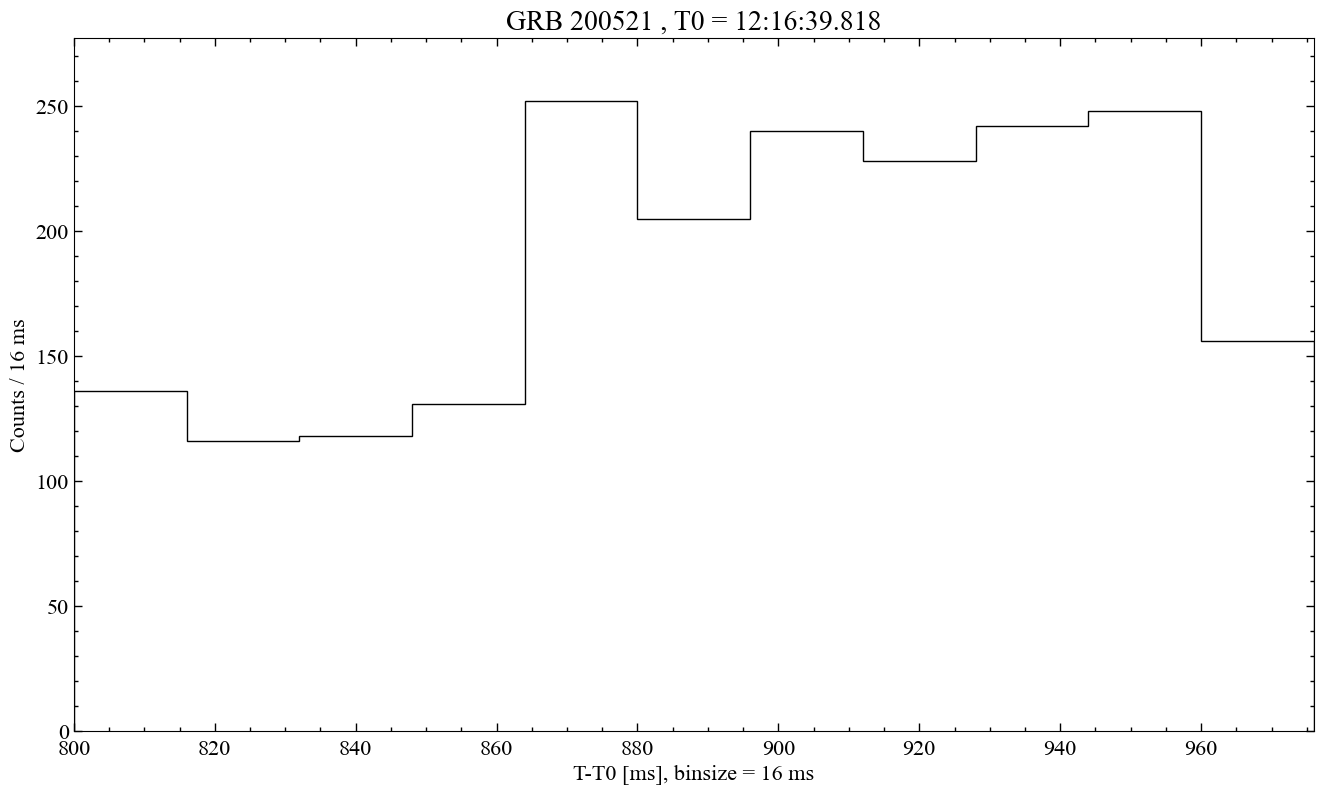

In [11]:
plot_HED(tus_arr=tus_burst[i:j]*1e6,binsize=16,T0=T0)

# CC

-0.256
1.744


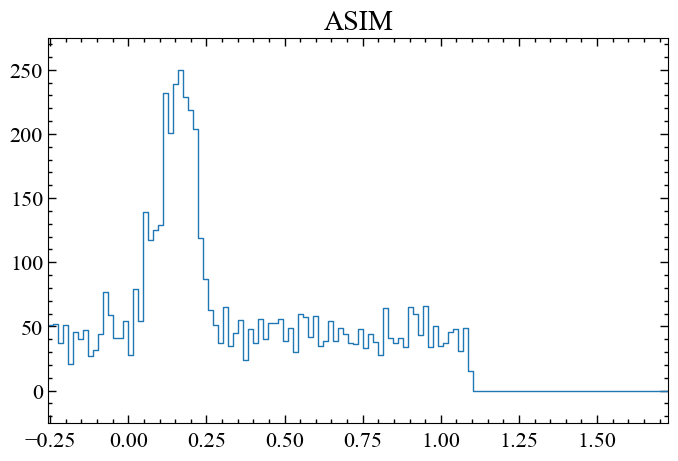

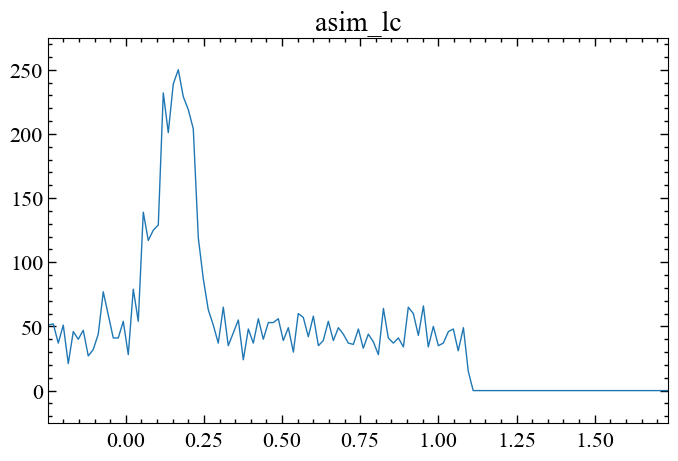

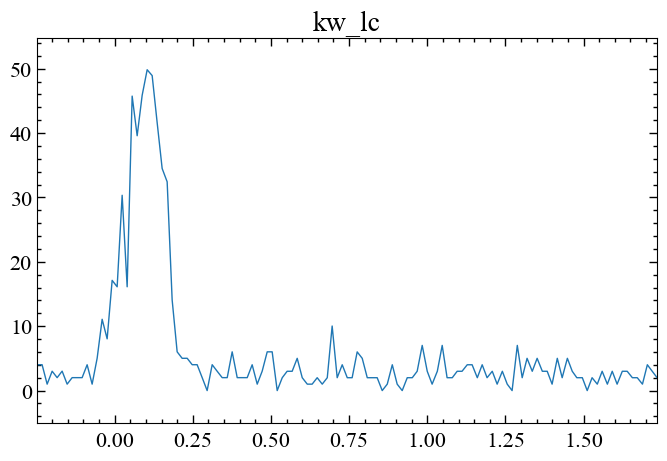

In [12]:
tlagg_approx = -0.75

kw_filename = "GRB200521A_16ms.txt"
kw_file = kw_lc_path + kw_filename
binsize=0.016

kw_df = pd.read_csv(kw_file,sep='\s+')
kw_bin_lo,kw_bin_hi,G1,G2,G3= kw_df["Ti"].to_numpy(dtype=np.float16), kw_df["Tf"].to_numpy(dtype=np.float16),kw_df["G1"].to_numpy(dtype=np.float16), kw_df["G2"].to_numpy(dtype=np.float16), kw_df["G3"].to_numpy(dtype=np.float16)

#kw_dt = np.round(np.diff(kw_bin_lo),3)
#i_stop_kw = np.where(kw_dt>2*binsize)[0][0]

#cutting LC at T0+1.5 s, so that both LC's have 2s of data
i_start_kw = find_nearest(kw_bin_lo,-0.25)
print(kw_bin_lo[i_start_kw])
i_stop_kw = find_nearest(kw_bin_lo,1.75)
print(kw_bin_lo[i_stop_kw])


kw_bin_lo, kw_bin_hi, G1, G2, G3 = kw_bin_lo[i_start_kw:i_stop_kw], kw_bin_hi[i_start_kw:i_stop_kw], G1[i_start_kw:i_stop_kw],G2[i_start_kw:i_stop_kw], G3[i_start_kw:i_stop_kw]
kwCounts = G3
kw_lc = LC(time=np.round(kw_bin_lo + binsize/2,3), counts=kwCounts, skip_checks=True,dt=binsize)

tus_burst += tlagg_approx
hist = np.histogram(tus_burst,bins=np.append(kw_bin_lo,kw_bin_hi[-1])) #using KW bins
asimCounts,asimEdges = hist[0],hist[1]

plt.step(x=asimEdges[:-1],y=asimCounts,where="post")
plt.title("ASIM")
plt.show()

asim_lc = LC(time=np.round(kw_bin_lo + binsize/2,3), counts=asimCounts, skip_checks=True,dt=binsize)
asim_lc.plot(title='asim_lc')
kw_lc.plot(title='kw_lc')

Total lagg (s):  -0.8140000000000001 | CC lagg:  -0.064   tlagg_approx:  -0.75


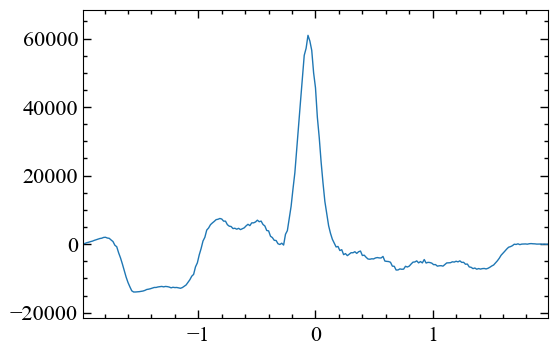

<AxesSubplot:>

In [13]:
CC = CrossCorrelation(kw_lc,asim_lc,mode="full")
CClagg=CC.time_shift
tlagg = tlagg_approx + CClagg
print("Total lagg (s): ", tlagg, "| CC lagg: ", CClagg, '  tlagg_approx: ', tlagg_approx)
CC.plot()

dau/det starting from index 1
tus array given in seconds
safety time:  0.17 % removed
sorted by tus (s)
tus array OK ...


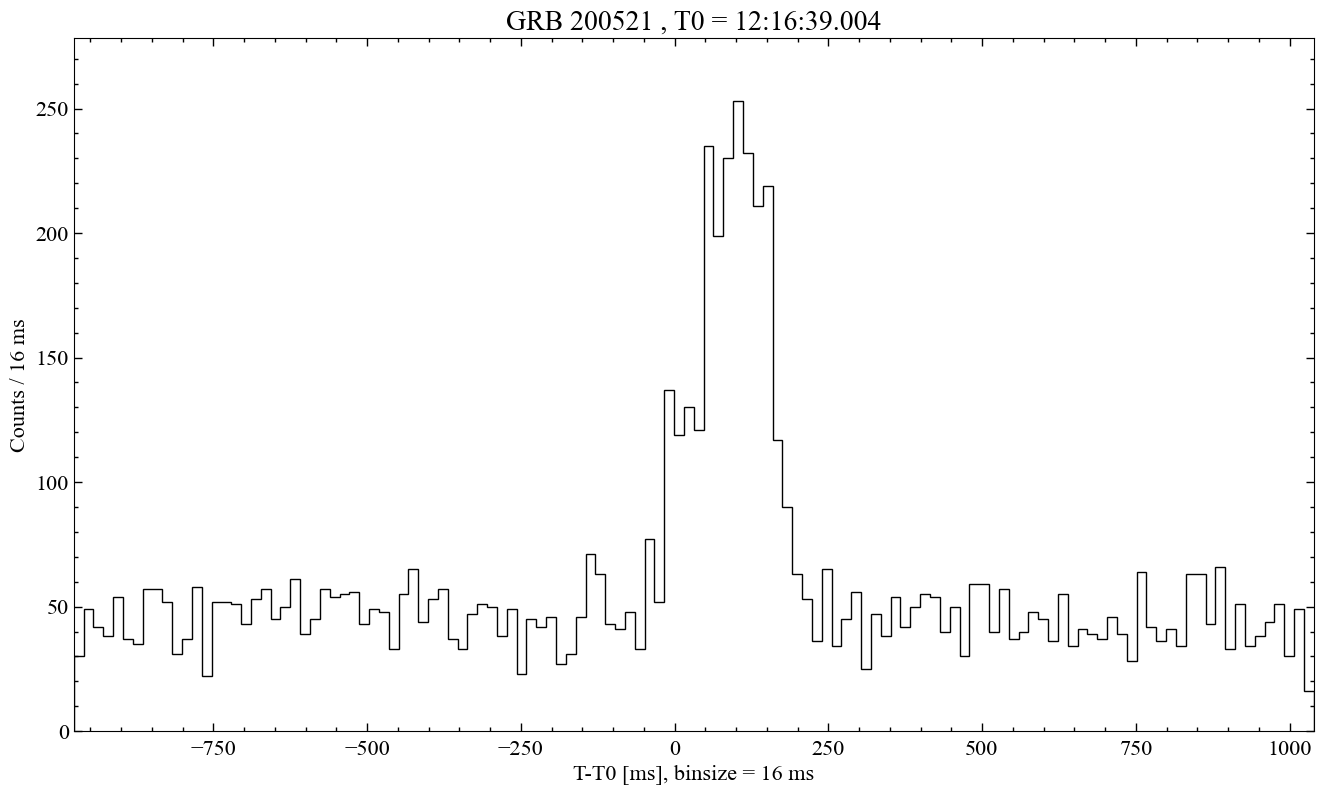

In [14]:
tlagg=-0.814
df_harvest = harvest_data(fn='2020_5_21_12_16_39',T0='2020-05-21T12:16:39.818')
df_harvest.sort_values(by='tus',inplace=True,ignore_index=True)
df_burst = df_harvest.truncate(before=6036)

df_burst['tus'] = df_burst['tus'].to_numpy() + tlagg
plot_HED(tus_arr=df_burst['tus'].to_numpy()*1e6,binsize=16,T0=T0+timedelta(seconds=tlagg))

# FITS

### BAK

In [15]:
tus = df_burst['tus'].to_numpy(dtype=np.float64)

tus array OK ...


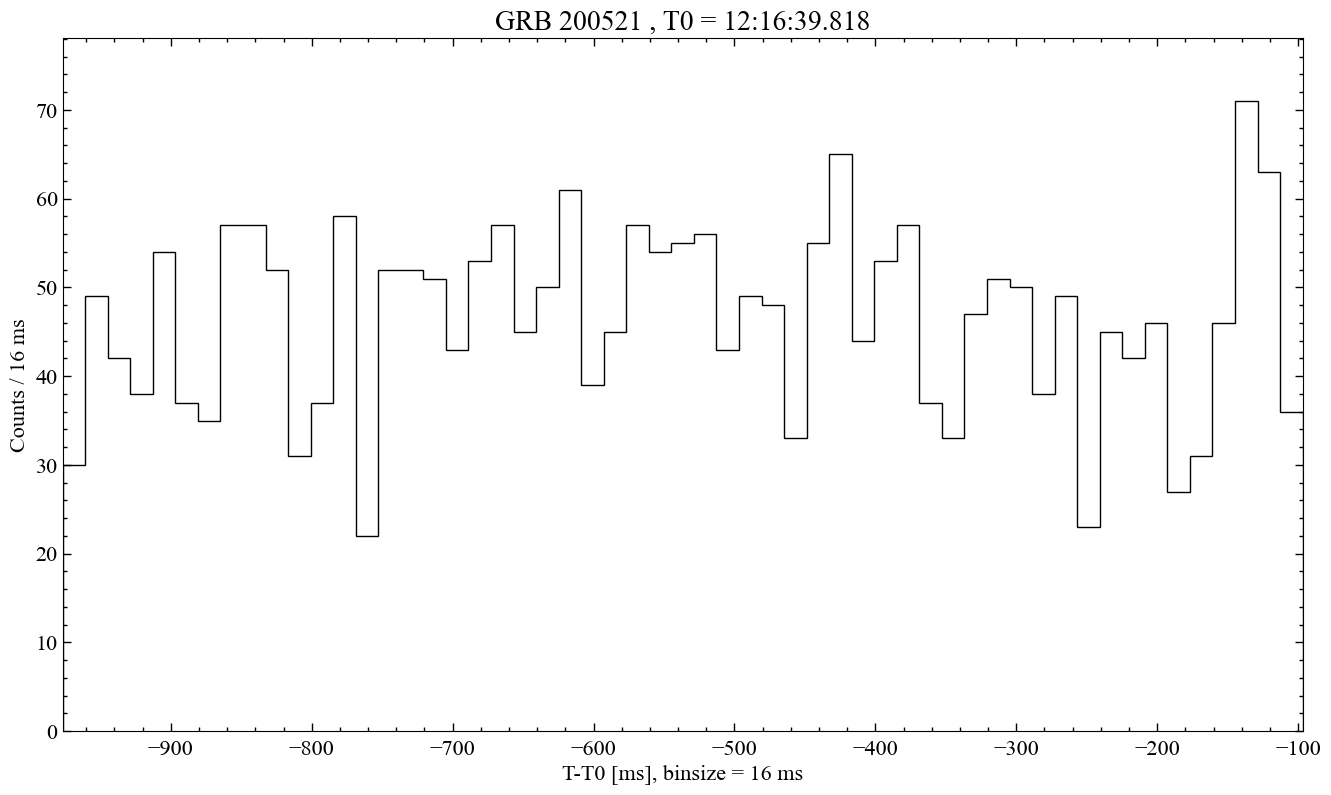

In [16]:
i_bkg_end = find_nearest(tus,-0.1)
df_bkg = df_burst.truncate(after=i_bkg_end+6036) #first index for dataframe
plot_HED(tus_arr=tus[:i_bkg_end]*1e6,binsize=16,T0=T0)

In [17]:
df_kev_bkg = keV_hist(df=df_bkg,time_interval='max',keV_interval='max')

initial len: (2552, 2552)
Start/Stop (-0.976766, -0.0994025839999999)
len kev 2552
len tus 2552
mean: 63.8
Energies binned!


In [18]:
print(T0+timedelta(seconds=tlagg))
print(tus[:i_bkg_end][0],tus[:i_bkg_end][-1])
print(tus[:i_bkg_end][-1]-tus[:i_bkg_end][0])

2020-05-21 12:16:39.004000
-0.976766 -0.10082566699999995
0.8759403330000001


In [19]:
ra,dec = 169.531, 7.222

In [97]:
BAK_dict = {
'USER': ['Andreas Ramsli','Username of creator of this fits file'], #<str>
'T0TIME':['2020-05-21T12:16:39.004','Trigger time UT format=YYYY-MM-DDThh:mm:ss.fff'], #<str> 
'TSTART': [-0.981481,'[s] Start time of background spectrum accumulation'], #<float> [s] Start time of spectrum accumulation relative to T0TIME
'TSTOP': [-0.100826,'End time of background spectrum accumulation'], #<float> [s]
'EXPOSURE': [0.880656,'[s] Integration time in seconds for the BAK data'], #<float> 
'OBJECT': ['GRB200521A','Name of the observed object'], #<str> 
'RA_OBJ': [169.531,'[deg] RA of source'], #<float> 
'DEC_OBJ':  [7.222,'[deg] Dec of source'], #<float>
'FILENAME': ['GRB200521A.bak','Backgorund filename for fits file'] #<str>  ('example.bak')
}
#More keys can be declated. Set generatePHA(see_template=True) to view avalible keys,values & comments from the template HDR's

In [98]:
df_kev_bkg.head()

,bins_keV,counts,poisson_error_counts
0,10.00000,0,0.0
1,12.58925,0,0.0
2,15.84893,0,0.0
3,19.95262,0,0.0
4,25.11886,0,0.0


In [99]:
bak_counts = df_kev_bkg['counts'].to_numpy()[1:]
stat_error = df_kev_bkg['poisson_error_counts'].to_numpy()[1:]
bin_lo = df_kev_bkg['bins_keV'].to_numpy()[:-1]
bin_hi = df_kev_bkg['bins_keV'].to_numpy()[1:]

In [100]:
generateBAK(BAK_dict=BAK_dict, bakCounts=bak_counts, stat_err=stat_error, bin_lo=bin_lo, bin_hi=bin_hi, see_headers=False)

## PHA

In [21]:
df_kev_burst = keV_hist(df=df_burst,time_interval=(0.00,0.256),keV_interval='max')

initial len: (7477, 7477)
Start/Stop (0.00018683300000010838, 0.2559167780000001)
len kev 2367
len tus 2367
mean: 59.175
Energies binned!


In [22]:
burst_counts = df_kev_burst['counts'].to_numpy()[1:]
stat_error_burst = df_kev_burst['poisson_error_counts'].to_numpy()[1:]
bin_lo = df_kev_burst['bins_keV'].to_numpy()[:-1]
bin_hi = df_kev_burst['bins_keV'].to_numpy()[1:]

In [109]:
PHA_dict = {
'USER': ['Andreas Ramsli','Username of creator of this fits file'], #<str>
'T0TIME':['2020-05-21T12:16:39.004','Trigger time UT format=YYYY-MM-DDThh:mm:ss.fff'], #<str> 
'TSTART': [0.0,'[s] Start time of spectrum accumulation'], #<float> [s] Start time of spectrum accumulation relative to T0TIME
'TSTOP': [0.256,'End time of spectrum accumulation'], #<float> [s]
'EXPOSURE': [0.256,'[s] Integration time in seconds for the PHA data'], #<float> 
'OBJECT': ['GRB200521A','Name of the observed object'], #<str> 
'RA_OBJ': [169.531,'[deg] RA of source'], #<float> 
'DEC_OBJ':  [7.222,'[deg] Dec of source'], #<float>
'BACKFILE': ['GRB200521A.bak','Background FITS file'], #<str> ('example.bak')
'RESPFILE': ['GRB200521A.rsp','Response FITS file'], #<str> ('example.rsp')
'FILENAME': ['GRB200521A.pha','PHA filename'] #<str>  ('example.pha')
}
#More keys can be declated. Set generatePHA(see_template=True) to view avalible keys,values & comments from the template HDR's


In [110]:
generatePHA(PHA_dict=PHA_dict, counts=burst_counts, stat_err=stat_error_burst, bin_lo=bin_lo, bin_hi=bin_hi, see_headers=False)

## RSP

In [111]:
theta,phi = 130.707,-45.646
find_DRM_file(dir_path='/Home/siv30/wad005/master/HED_DRM/data/',
             theta=theta,phi=phi)

'HED_drm_mats_135.00_-45.00.txt'

In [24]:
RSP_dict = {
'USER': ['Andreas Ramsli','Username of creator of this fits file'], #<str>
'T0TIME':['2020-05-21T12:16:39.004','Trigger time UT format=YYYY-MM-DDThh:mm:ss.fff'], #<str> 
'TSTART': [0.0,'[s] Start time of spectrum accumulation'], #<float> [s] Start time of spectrum accumulation relative to T0TIME
'TSTOP': [0.256,'End time of spectrum accumulation'], #<float> [s]
'EXPOSURE': [0.256,'[s] Integration time in seconds for the PHA data'], #<float> 
'OBJECT': ['GRB200521A','Name of the observed object'], #<str> 
'RA_OBJ': [169.531,'[deg] RA of source'], #<float> 
'DEC_OBJ':  [7.222,'[deg] Dec of source'], #<float>
'FILENAME': ['GRB200521A_mod.rsp','RSP filename'], #<str>  ('example.pha')
'COMMENT': ['Theta = 130.707', '[deg] angle used for DRM'],
'COMMENT': ['Phi = -45.646', '[deg] angle used for DRM']
}
#Add a comment for the theta,phi angles used for the DRM
#More keys can be declated. Set generatePHA(see_template=True) to view avalible keys,values & comments from the template HDR's

In [25]:
generateRSP(RSP_dict=RSP_dict, DRM_fname='HED_drm_mats_150.00_-135.00.txt', bin_lo=bin_lo, bin_hi=bin_hi,theta=130.707,phi=7.222,see_headers=False)

In [20]:
bin_lo

NameError: name 'bin_lo' is not defined

## comparing count rate for burst duration

In [116]:
i_kw,j_kw = find_nearest(kw_bin_lo,0.00),find_nearest(kw_bin_lo,0.256)
print(kw_bin_lo[i_kw:j_kw])
print(sum(kwCounts[i_kw:j_kw+1])/(len(kw_bin_lo[i_kw:j_kw])*0.016))

[0.    0.016 0.032 0.048 0.064 0.08  0.096 0.112 0.128 0.144 0.16  0.176
 0.192 0.208 0.224 0.24 ]
1716.1102294921875


In [115]:
tus_burst = df_burst['tus'].to_numpy()
i_hed, j_hed = find_nearest(tus_burst,0.00),find_nearest(tus_burst,0.256)
len(tus_burst[i_hed:j_hed])/(tus_burst[i_hed:j_hed][-1]-tus_burst[i_hed:j_hed][0])

9304.401746189744

In [117]:
tus_burst = df_burst['tus'].to_numpy()
i_hed, j_hed = find_nearest(tus_burst,-0.981481),find_nearest(tus_burst,-0.100826)
len(tus_burst[i_hed:j_hed])/(tus_burst[i_hed:j_hed][-1]-tus_burst[i_hed:j_hed][0])

2908.697114470999

In [118]:
9304-2908 #bkg subtracted

6396

In [121]:
6396/1716

3.727272727272727